# Dealing with Dirty Data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the diabetes data
# The dataset in the class folder has been made dirty on purpose
# The real dataset can be found here https://www.kaggle.com/andrewmvd/early-diabetes-classification/version/1
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40.0,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1.0,1
1,58.0,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,1
2,41.0,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0.0,1
3,45.0,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0.0,1
4,60.0,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1.0,1


In [3]:
# Check out the non-null counts and data types using the .info() method
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 464 non-null    float64
 1   gender              464 non-null    object 
 2   polyuria            465 non-null    int64  
 3   polydipsia          465 non-null    int64  
 4   sudden_weight_loss  465 non-null    int64  
 5   weakness            465 non-null    int64  
 6   polyphagia          465 non-null    int64  
 7   genital_thrush      465 non-null    int64  
 8   visual_blurring     465 non-null    int64  
 9   itching             465 non-null    int64  
 10  irritability        465 non-null    int64  
 11  delayed_healing     465 non-null    int64  
 12  partial_paresis     465 non-null    int64  
 13  muscle_stiffness    465 non-null    int64  
 14  alopecia            465 non-null    int64  
 15  obesity             464 non-null    float64
 16  class   

In [4]:
# Does anything look suspicious here?
diabetes.describe()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
count,464.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,464.000000
mean,49.066810,0.539785,0.509677,0.464516,0.619355,0.475269,0.247312,0.462366,0.492473,0.253763,0.462366,0.462366,0.376344,0.333333,0.185345
std,26.573137,0.498951,0.500445,0.499276,0.486068,0.499926,0.431914,0.499119,0.500482,0.435633,0.499119,0.499119,0.484990,0.471912,0.388996
min,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,567.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Assignment: fill in the two dataframes created for you with the cleaned and refined data

In [5]:
diabetes_dropna = pd.DataFrame()
diabetes_imputed = pd.DataFrame()

# Missing Data

In [6]:
# Which columns have missing data?
# Age, Gender and Obesity have missing values 
# which can be seen by only having 464 non-null values when examining the dataframe info()
null_values = diabetes[diabetes.isna().any(axis=1)]
null_values

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
7,NaN,Male,1,1,1,1,0,0,1,1,1,0,1,1,0,0.0,1
24,58.0,Male,1,1,1,1,1,0,1,0,0,1,1,1,0,NaN,1
63,60.0,NaN,1,0,1,1,0,1,1,1,0,1,1,1,0,1.0,1


In [7]:
# Drop rows with missing data
diabetes_dropna = diabetes.dropna()
diabetes_dropna.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40.0,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1.0,1
1,58.0,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,1
2,41.0,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0.0,1
3,45.0,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0.0,1
4,60.0,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1.0,1


In [8]:
# fill missing values using .fillna()
# read documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
diabetes_imputed = diabetes.fillna(method='pad')
diabetes_imputed.head(8)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40.0,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1.0,1
1,58.0,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,1
2,41.0,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0.0,1
3,45.0,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0.0,1
4,60.0,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1.0,1
5,55.0,Male,1,1,0,1,1,0,1,1,0,1,0,1,1,1.0,1
6,57.0,Male,1,1,0,1,1,1,0,0,0,1,1,0,0,0.0,1
7,57.0,Male,1,1,1,1,0,0,1,1,1,0,1,1,0,0.0,1


In [9]:
# Which method is best? Dropping or filling in? Why?

# Nonsensical Data

In [10]:
# What are some nonsense data values within the data?
# Hint: there are 4 known issues

# Let's look at the unique values in each colmn
print(diabetes_dropna.age.unique().max())
print(diabetes_dropna.age.unique().min())

567.0
-5.0


In [11]:
# Drop the rows with bad data
diabetes_dropna = diabetes_dropna[(diabetes_dropna['age'] > 1) & (diabetes_dropna['age'] < 100)]
diabetes_dropna

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40.0,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1.0,1
1,58.0,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,1
2,41.0,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0.0,1
3,45.0,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0.0,1
4,60.0,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,39.0,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0.0,1
459,48.0,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0.0,1
460,58.0,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1.0,1
462,35.0,NonBinary,1,1,1,1,1,0,1,0,0,0,1,1,0,1.0,1


In [12]:
for ColName,ColValues in diabetes_dropna.iteritems():
    print('Column Name : ', ColName)
    print("Values : ", ColValues.unique())

Column Name :  age
Values :  [40. 58. 41. 45. 60. 55. 57. 67. 70. 44. 38. 35. 61. 54. 66. 43. 62. 39.
 48. 32. 42. 52. 53. 37. 49. 63. 30. 50. 46. 36. 51. 59. 65. 25. 47. 28.
 68. 56. 31. 85. 90. 72. 69. 79. 34. 16. 33. 64.]
Column Name :  gender
Values :  ['Male' 'Female' 'NonBinary']
Column Name :  polyuria
Values :  [0 1]
Column Name :  polydipsia
Values :  [1 0]
Column Name :  sudden_weight_loss
Values :  [0 1]
Column Name :  weakness
Values :  [1 0]
Column Name :  polyphagia
Values :  [0 1]
Column Name :  genital_thrush
Values :  [0 1]
Column Name :  visual_blurring
Values :  [0 1]
Column Name :  itching
Values :  [1 0]
Column Name :  irritability
Values :  [0 1]
Column Name :  delayed_healing
Values :  [1 0]
Column Name :  partial_paresis
Values :  [0 1]
Column Name :  muscle_stiffness
Values :  [1 0]
Column Name :  alopecia
Values :  [1 0]
Column Name :  obesity
Values :  [1. 0.]
Column Name :  class
Values :  ['1' '0' 'Positive']


In [13]:
# Update the class = Positive to class = 1
diabetes_dropna.loc[diabetes_dropna['class'] == 'Positive'] = '1'

In [14]:
# Drop the gender rows where the values are not male or female
diabetes_dropna = diabetes_dropna[(diabetes_dropna['gender'] == 'Male') | (diabetes_dropna['gender'] == 'Female')]
diabetes_dropna

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40.0,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1.0,1
1,58.0,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,1
2,41.0,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0.0,1
3,45.0,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0.0,1
4,60.0,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,62.0,Female,1,1,1,1,0,0,1,0,0,0,1,0,0,1.0,1
457,54.0,Female,1,1,1,1,1,0,0,0,0,0,1,0,0,0.0,1
458,39.0,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0.0,1
459,48.0,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0.0,1


In [15]:
for ColName,ColValues in diabetes_dropna.iteritems():
    print('Column Name : ', ColName)
    print("Values : ", ColValues.unique())

Column Name :  age
Values :  [40.0 58.0 41.0 45.0 60.0 55.0 57.0 67.0 70.0 44.0 38.0 35.0 61.0 54.0
 66.0 43.0 62.0 39.0 48.0 32.0 42.0 52.0 53.0 37.0 49.0 63.0 30.0 50.0
 46.0 36.0 51.0 59.0 65.0 25.0 47.0 28.0 68.0 56.0 31.0 85.0 90.0 72.0
 69.0 79.0 34.0 16.0 33.0 64.0]
Column Name :  gender
Values :  ['Male' 'Female']
Column Name :  polyuria
Values :  [0 1]
Column Name :  polydipsia
Values :  [1 0]
Column Name :  sudden_weight_loss
Values :  [0 1]
Column Name :  weakness
Values :  [1 0]
Column Name :  polyphagia
Values :  [0 1]
Column Name :  genital_thrush
Values :  [0 1]
Column Name :  visual_blurring
Values :  [0 1]
Column Name :  itching
Values :  [1 0]
Column Name :  irritability
Values :  [0 1]
Column Name :  delayed_healing
Values :  [1 0]
Column Name :  partial_paresis
Values :  [0 1]
Column Name :  muscle_stiffness
Values :  [1 0]
Column Name :  alopecia
Values :  [1 0]
Column Name :  obesity
Values :  [1.0 0.0]
Column Name :  class
Values :  ['1' '0']


# Class Imbalance

Text(0, 0.5, 'Number of Patients')

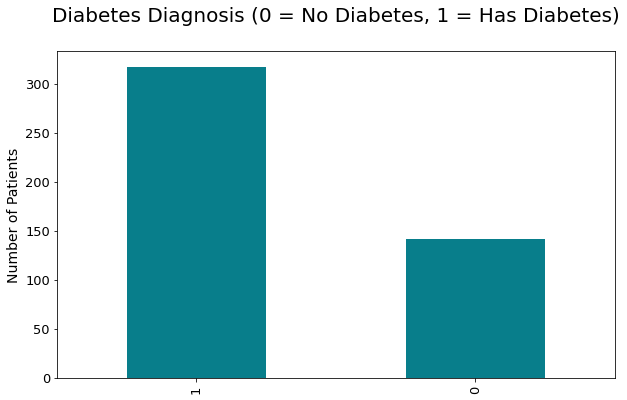

In [16]:
ax = diabetes_dropna['class'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Diabetes Diagnosis (0 = No Diabetes, 1 = Has Diabetes)', size=20, pad=30)
ax.set_ylabel('Number of Patients', fontsize=14)

# Generating Synthetic Data

In [17]:
# First, let's scale the data to be all 0 and 1
# Age and Gender are currently not in this 0 - 1 format

# Let's make Male = 1 and Female = 0
diabetes_dropna['gender'] = [1 if x == 'Male' else 0 for x in diabetes_dropna['gender']]

<ipython-input-17-340d4a176b47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_dropna['gender'] = [1 if x == 'Male' else 0 for x in diabetes_dropna['gender']]


In [26]:
# To make theage scaled properly we will use sklearn min max scaler
from sklearn.preprocessing import MinMaxScaler
from numpy import asarray

mms = MinMaxScaler()
X = diabetes_dropna['age']
X = X.astype(np.float64)
X = asarray(X)
X = X.reshape(-1, 1)
scaled = mms.fit_transform(X)
 [0.32432432]
 [0.41891892]
print(scaled)

[[0.32432432]
 [0.56756757]
 [0.33783784]
 [0.39189189]
 [0.59459459]
 [0.52702703]
 [0.55405405]
 [0.68918919]
 [0.72972973]
 [0.37837838]
 [0.2972973 ]
 [0.25675676]
 [0.60810811]
 [0.59459459]
 [0.56756757]
 [0.51351351]
 [0.68918919]
 [0.67567568]
 [0.36486486]
 [0.62162162]
 [0.51351351]
 [0.31081081]
 [0.43243243]
 [0.21621622]
 [0.35135135]
 [0.48648649]
 [0.2972973 ]
 [0.5       ]
 [0.55405405]
 [0.33783784]
 [0.28378378]
 [0.51351351]
 [0.44594595]
 [0.43243243]
 [0.59459459]
 [0.63513514]
 [0.25675676]
 [0.18918919]
 [0.5       ]
 [0.45945946]
 [0.45945946]
 [0.25675676]
 [0.32432432]
 [0.43243243]
 [0.59459459]
 [0.59459459]
 [0.25675676]
 [0.40540541]
 [0.27027027]
 [0.45945946]
 [0.59459459]
 [0.45945946]
 [0.47297297]
 [0.2972973 ]
 [0.67567568]
 [0.5       ]
 [0.58108108]
 [0.31081081]
 [0.66216216]
 [0.25675676]
 [0.52702703]
 [0.39189189]
 [0.32432432]
 [0.18918919]
 [0.25675676]
 [0.12162162]
 [0.45945946]
 [0.32432432]
 [0.25675676]
 [0.66216216]
 [0.2972973 ]
 [0.45

In [27]:
diabetes_dropna['age'] = scaled
diabetes_dropna.head()

<ipython-input-27-cf7944e0353b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_dropna['age'] = scaled


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1.0,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0.0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0.0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1.0,1


In [29]:
# Install in the command line: pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 

In [ ]:
# Let's make model on the current data and then make the same model after SMOTE

# Decision Tree / Random Forest

## With an imbalanced dataset

In [31]:
# Split into train and test set
from sklearn.model_selection import train_test_split

X = diabetes_dropna.drop('class',axis=1)
y = diabetes_dropna[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

<ipython-input-36-e1a884083979>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


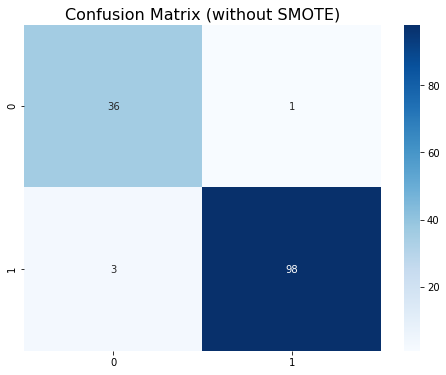

In [42]:
# Evaluate
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [46]:
print('Accuracy: ', accuracy_score(y_test, preds))
#What are the other metrics based on the confusion matrix?

Accuracy:  0.9710144927536232


## With a balanced dataset constructed using SMOTE

In [47]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (458, 16)
Shape of X after SMOTE: (634, 16)

Balance of positive and negative classes (%):


class
0        50.0
1        50.0
dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

<ipython-input-48-7925890d4260>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


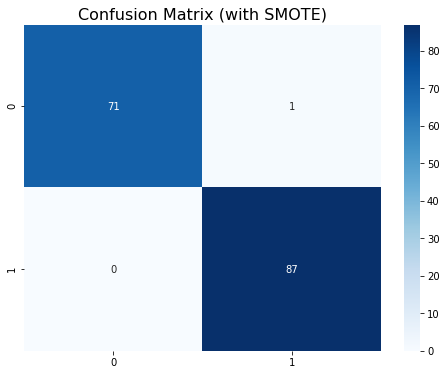

In [49]:
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [50]:
print('Accuracy: ', accuracy_score(y_test, preds))
#What are the other metrics based on the confusion matrix?

Accuracy:  0.9937106918238994


# Model Evaluation & Comparison - Which model is better, why?
# Are there any drawbacks to using SMOTE?